In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data/data_raw.csv')

/Users/hugorebeix/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (95,96,97,98,100,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,120,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.shape

(870492, 124)

In [4]:
describe = data.describe(include='all')

In [5]:
describe

,Unnamed: 0,Country Name,Country Code,Indicator Name_x,Indicator Code,1970,1971,1972,1973,1974,...,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31,DESCRIPTION,Unnamed: 3
count,870492.000000,870492,870492,870492,870492,7.148000e+04,3.444300e+04,3.451400e+04,3.446700e+04,3.467500e+04,...,509292,577920,400932,512904.0,386484.000000,668220.000000,646548.0,0.0,613,0.0
unique,NaN,241,241,3612,3612,NaN,NaN,NaN,NaN,NaN,...,60,75,2,44.0,NaN,NaN,21.0,NaN,97,NaN
top,NaN,Qatar,HND,PASEC: Average performance gap between 6th gra...,LO.EGRA.READ.0.CIN.2GRD,NaN,NaN,NaN,NaN,NaN,...,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 2012",Yes,2010.0,NaN,NaN,2005.0,NaN,Data sources : United Nations World Population...,NaN
freq,NaN,3612,3612,241,241,NaN,NaN,NaN,NaN,NaN,...,36120,54180,397320,82920.0,NaN,NaN,144480.0,NaN,154,NaN
mean,435245.500000,NaN,NaN,NaN,NaN,1.997095e+09,4.388745e+09,4.739394e+09,5.264671e+09,5.565835e+09,...,NaN,NaN,NaN,NaN,2008.102804,2010.994595,NaN,NaN,NaN,NaN
std,251289.539602,NaN,NaN,NaN,NaN,1.218514e+11,1.833238e+11,1.944465e+11,2.091105e+11,2.144020e+11,...,NaN,NaN,NaN,NaN,2.604581,2.562723,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,...,NaN,NaN,NaN,NaN,2000.000000,1995.000000,NaN,NaN,NaN,NaN
25%,217622.750000,NaN,NaN,NaN,NaN,8.700000e-01,1.045615e+01,1.076718e+01,1.116327e+01,1.131197e+01,...,NaN,NaN,NaN,NaN,2007.000000,2011.000000,NaN,NaN,NaN,NaN
50%,435245.500000,NaN,NaN,NaN,NaN,6.570000e+00,7.207677e+01,7.685992e+01,7.963683e+01,8.090797e+01,...,NaN,NaN,NaN,NaN,2009.000000,2012.000000,NaN,NaN,NaN,NaN
75%,652868.250000,NaN,NaN,NaN,NaN,6.387674e+01,6.452600e+04,6.653125e+04,6.973650e+04,7.127600e+04,...,NaN,NaN,NaN,NaN,2010.000000,2012.000000,NaN,NaN,NaN,NaN


Faisons un état des lieux du set de données non nettoyé

In [6]:
nb_rows = len(data)
nb_rows

870492

In [7]:
counts = describe.iloc[0]

In [8]:
counts = np.array(counts)
counts_freq = counts/nb_rows
xlabel1 = data.columns[:int(len(data.columns)/2)]
xlabel2 = data.columns[int(len(data.columns)/2):]
counts_freq1 = counts_freq[:int(len(data.columns)/2)]
counts_freq2 = counts_freq[int(len(data.columns)/2):]

<BarContainer object of 62 artists>

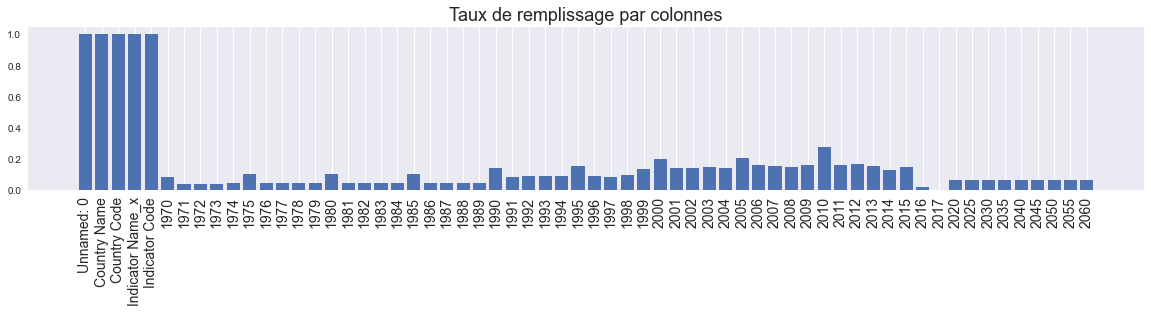

In [9]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn')
plt.title("Taux de remplissage par colonnes", fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.grid(False, axis='y')
plt.bar(xlabel1, counts_freq1, align='center')

<BarContainer object of 62 artists>

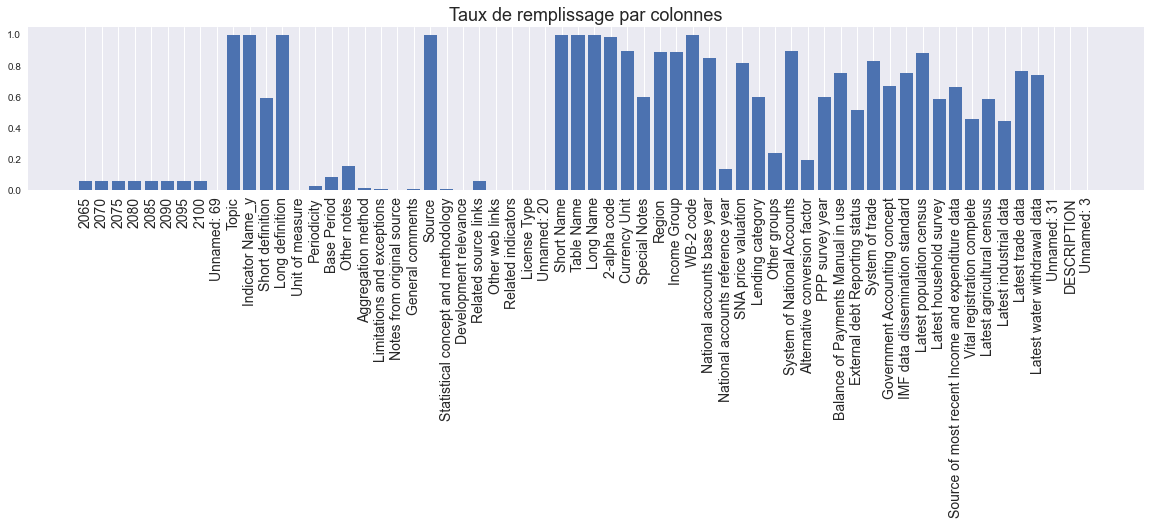

In [10]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn')
plt.title("Taux de remplissage par colonnes", fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.grid(False, axis='y')
plt.bar(xlabel2, counts_freq2, align='center')

In [11]:
cells_total = data.size
filled_cells = counts.sum()
empty_cells = cells_total - filled_cells

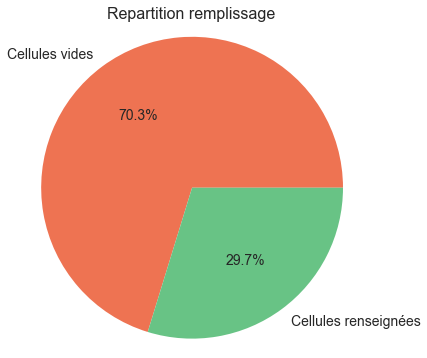

In [12]:
fig = plt.figure(figsize=(6,6))
plt.title('Repartition remplissage', fontsize=16)
plt.pie([empty_cells, filled_cells], labels=['Cellules vides', 'Cellules renseignées'], colors=['#EE7352', '#68C385'], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.axis('equal')
plt.show()

Retirons les colonnes vides

In [13]:
counts = describe.iloc[0]

In [14]:
counts

Unnamed: 0                      870492
Country Name                    870492
Country Code                    870492
Indicator Name_x                870492
Indicator Code                  870492
                                 ...  
Latest trade data               668220
Latest water withdrawal data    646548
Unnamed: 31                          0
DESCRIPTION                        613
Unnamed: 3                           0
Name: count, Length: 124, dtype: object

In [15]:
useless_cols = counts[counts/len(data) < 0.25]

In [16]:
useless_cols.index

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050',
       '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095',
       '2100', 'Unnamed: 69', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20', 'National accounts reference year',
       'Other groups

Je ne veux pas retirer les colonnes concernant les années car c'est là ou se situe la valeur ajoutée

In [17]:
useless_cols

1970                              71480
1971                              34443
1972                              34514
1973                              34467
1974                              34675
                                  ...  
Other groups                     209496
Alternative conversion factor    169764
Unnamed: 31                           0
DESCRIPTION                         613
Unnamed: 3                            0
Name: count, Length: 86, dtype: object

In [18]:
useless_cols = pd.DataFrame(useless_cols)

In [19]:
useless_cols['index'] = useless_cols.index

In [20]:
year_test = lambda name : not name.isdigit()
useless_cols = useless_cols[useless_cols['index'].map(year_test)]

In [21]:
useless_cols

,count,index
Unnamed: 69,0,Unnamed: 69
Unit of measure,0,Unit of measure
Periodicity,23859,Periodicity
Base Period,75674,Base Period
Other notes,132068,Other notes
Aggregation method,11327,Aggregation method
Limitations and exceptions,3374,Limitations and exceptions
Notes from original source,0,Notes from original source
General comments,3374,General comments
Statistical concept and methodology,5543,Statistical concept and methodology


Je pense que la colonne 'Statistical concept and methodology' peut tout de même être pertinente

In [22]:
useless_cols = useless_cols.drop(index='Statistical concept and methodology')

In [23]:
data = data.drop(columns=useless_cols.index)

In [24]:
data.shape

(870492, 103)

### Parmis les 3600 indicateurs, il faudrait selectionner ceux qui sont en relation avec notre problématique "métier".
#### On va donc établir une liste de mots clés en relation avec cette problématique.
#### On recherche des pays dont le marché est propice à un developpement de l'activité d'une plateforme d'apprentissage en ligne pour les 15 - 30 ans (en prenant large). On va donc chercher des mots clés liés à l'age, à l'accès internet, à l'éducation.

In [25]:
cols = data.columns
cols

Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Indicator Name_x',
       'Indicator Code', '1970', '1971', '1972', '1973', '1974',
       ...
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object', length=103)

In [26]:
indicateurs = data['Indicator Name_x'].unique()

In [27]:
indicateurs[:5]

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       'Adjusted net enrolment rate, lower secondary, male (%)',
       'Adjusted net enrolment rate, primary, both sexes (%)'],
      dtype=object)

In [28]:
print(data.columns)

Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Indicator Name_x',
       'Indicator Code', '1970', '1971', '1972', '1973', '1974',
       ...
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object', length=103)


In [29]:
data_pop_test = data[data['Indicator Code'] == 'SP.POP.TOTL']

In [30]:
data_pop_test

,Unnamed: 0,Country Name,Country Code,Indicator Name_x,Indicator Code,1970,1971,1972,1973,1974,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
2490,2490,Arab World,ARB,"Population, total",SP.POP.TOTL,1.234009e+08,1.267261e+08,1.300956e+08,1.335924e+08,1.373274e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6102,6102,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.288581e+09,1.322182e+09,1.354003e+09,1.384272e+09,1.414385e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9714,9714,East Asia & Pacific (excluding high income),EAP,"Population, total",SP.POP.TOTL,1.115427e+09,1.146090e+09,1.175063e+09,1.203125e+09,1.229693e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13326,13326,Euro area,EMU,"Population, total",SP.POP.TOTL,2.874162e+08,2.890325e+08,2.910407e+08,2.929618e+08,2.946894e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16938,16938,Europe & Central Asia,ECS,"Population, total",SP.POP.TOTL,7.379482e+08,7.436074e+08,7.498159e+08,7.558680e+08,7.617013e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854922,854922,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,6.300000e+04,7.100000e+04,7.600000e+04,8.400000e+04,9.000000e+04,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
858534,858534,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,...,Budgetary central government,Special Data Dissemination Standard (SDDS),2007,"Multiple Indicator Cluster Survey (MICS), 2010","Integrated household survey (IHS), 2009",NaN,NaN,2010.0,NaN,2005
862146,862146,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,6.193810e+06,6.300554e+06,6.407295e+06,6.523452e+06,6.661566e+06,...,Budgetary central government,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005
865758,865758,Zambia,ZMB,"Population, total",SP.POP.TOTL,4.173928e+06,4.317748e+06,4.469895e+06,4.629402e+06,4.794754e+06,...,Budgetary central government,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002


Il reste encore beaucoup trop de colonnes.

In [31]:
kpi_columns = data[['Indicator Name_x', 'Indicator Name_y']]

In [32]:
kpi_columns

,Indicator Name_x,Indicator Name_y
0,"Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ..."
1,"Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ..."
2,"Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ..."
3,"Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ..."
4,"Adjusted net enrolment rate, primary, both sex...","Adjusted net enrolment rate, primary, both sex..."
...,...,...
870487,"Youth illiterate population, 15-24 years, % fe...","Youth illiterate population, 15-24 years, % fe..."
870488,"Youth literacy rate, population 15-24 years, b...","Youth literacy rate, population 15-24 years, b..."
870489,"Youth literacy rate, population 15-24 years, f...","Youth literacy rate, population 15-24 years, f..."
870490,"Youth literacy rate, population 15-24 years, g...","Youth literacy rate, population 15-24 years, g..."


In [33]:
kpi_columns.describe()

,Indicator Name_x,Indicator Name_y
count,870492,870492
unique,3612,3612
top,PASEC: Average performance gap between 6th gra...,Projection: Percentage of the population age 6...
freq,241,241


In [34]:
data = data.drop(columns=['Indicator Name_y'])

In [35]:
data['Unnamed: 0']

0              0
1              1
2              2
3              3
4              4
           ...  
870487    870487
870488    870488
870489    870489
870490    870490
870491    870491
Name: Unnamed: 0, Length: 870492, dtype: int64

c'est une copie des index

In [36]:
data = data.drop(columns=['Unnamed: 0'])

## Evaluons le contenu de chacunes des cols

In [37]:
useless_cols_manual = []

In [38]:
data.columns[69]

'Topic'

In [39]:
data.Topic

0         Secondary
1         Secondary
2         Secondary
3         Secondary
4           Primary
            ...    
870487     Literacy
870488     Literacy
870489     Literacy
870490     Literacy
870491     Literacy
Name: Topic, Length: 870492, dtype: object

In [40]:
data.Topic.unique()

array(['Secondary', 'Primary', 'Literacy', 'Teachers', 'EMIS',
       'Expenditures', 'Attainment', 'Education Equality', 'Background',
       'Learning Outcomes', 'Early Childhood Education', 'Tertiary',
       'Post-Secondary/Non-Tertiary',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Pre-Primary', 'Infrastructure: Communications',
       'Social Protection & Labor: Labor force structure',
       'Health: Mortality', 'Health: Population: Dynamics', 'Population',
       'Health: Population: Structure', 'Health: Risk factors',
       'Early Child Development (SABER)',
       'Education Management Information Systems (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Auto

Topic est interessant

In [41]:
data.columns[70]

'Short definition'

In [42]:
data.columns[71]

'Long definition'

Je ne garde que la longue définition

In [43]:
useless_cols_manual.append(data.columns[70])

In [44]:
useless_cols_manual

['Short definition']

In [45]:
data.columns[72]

'Source'

In [46]:
data.Source

0         UNESCO Institute for Statistics
1         UNESCO Institute for Statistics
2         UNESCO Institute for Statistics
3         UNESCO Institute for Statistics
4         UNESCO Institute for Statistics
                       ...               
870487    UNESCO Institute for Statistics
870488    UNESCO Institute for Statistics
870489    UNESCO Institute for Statistics
870490    UNESCO Institute for Statistics
870491    UNESCO Institute for Statistics
Name: Source, Length: 870492, dtype: object

In [47]:
data.columns[73]

'Statistical concept and methodology'

In [48]:
data['Statistical concept and methodology']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
870487    NaN
870488    NaN
870489    NaN
870490    NaN
870491    NaN
Name: Statistical concept and methodology, Length: 870492, dtype: object

In [49]:
data['Statistical concept and methodology'].unique()

array([nan,
       'The standard definition of unemployed persons is those individuals without work in a recent past period, and currently available for and seeking for employment. But there may be persons who do not actively "seek" work because they view job opportunities as limited, or because they have restricted labour mobility, or face discrimination, or structural, social or cultural barriers. NEET rates capture more broadly untapped potential youth, including such individuals who want to work but are not seeking work (often called the "hidden unemployed" or "discouraged workers").\n\nYouth are defined as persons ages 15 to 24; young adults are those ages 25 to 29; and adults are those ages 25 and above. However, countries vary somewhat in their operational definitions. In particular, the lower age limit for young people is usually determined by the minimum age for leaving school, where this exists.',
       'TIMSS'], dtype=object)

In [50]:
useless_cols_manual.append(data.columns[73])

In [51]:
data.columns[74]

'Short Name'

In [52]:
data['Short Name']

0         Arab World
1         Arab World
2         Arab World
3         Arab World
4         Arab World
             ...    
870487      Zimbabwe
870488      Zimbabwe
870489      Zimbabwe
870490      Zimbabwe
870491      Zimbabwe
Name: Short Name, Length: 870492, dtype: object

In [53]:
data['Country Name']

0         Arab World
1         Arab World
2         Arab World
3         Arab World
4         Arab World
             ...    
870487      Zimbabwe
870488      Zimbabwe
870489      Zimbabwe
870490      Zimbabwe
870491      Zimbabwe
Name: Country Name, Length: 870492, dtype: object

C'est un doublon

In [54]:
useless_cols_manual.append(data.columns[74])

In [55]:
data.columns[75]

'Table Name'

In [56]:
data[data.columns[75]]

0         Arab World
1         Arab World
2         Arab World
3         Arab World
4         Arab World
             ...    
870487      Zimbabwe
870488      Zimbabwe
870489      Zimbabwe
870490      Zimbabwe
870491      Zimbabwe
Name: Table Name, Length: 870492, dtype: object

encore un doublon 

In [57]:
useless_cols_manual.append(data.columns[75])

In [58]:
data.columns[76]

'Long Name'

In [59]:
data[data.columns[76]]

0                   Arab World
1                   Arab World
2                   Arab World
3                   Arab World
4                   Arab World
                  ...         
870487    Republic of Zimbabwe
870488    Republic of Zimbabwe
870489    Republic of Zimbabwe
870490    Republic of Zimbabwe
870491    Republic of Zimbabwe
Name: Long Name, Length: 870492, dtype: object

encore un doublon

In [60]:
useless_cols_manual.append(data.columns[76])

In [61]:
data[data.columns[77]]

0         1A
1         1A
2         1A
3         1A
4         1A
          ..
870487    ZW
870488    ZW
870489    ZW
870490    ZW
870491    ZW
Name: 2-alpha code, Length: 870492, dtype: object

In [62]:
useless_cols_manual.append(data.columns[77])

In [63]:
data[data.columns[78]]

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
870487    U.S. dollar
870488    U.S. dollar
870489    U.S. dollar
870490    U.S. dollar
870491    U.S. dollar
Name: Currency Unit, Length: 870492, dtype: object

In [64]:
useless_cols_manual.append(data.columns[78])

In [65]:
data[data.columns[79]]

0         Arab World aggregate. Arab World is composed o...
1         Arab World aggregate. Arab World is composed o...
2         Arab World aggregate. Arab World is composed o...
3         Arab World aggregate. Arab World is composed o...
4         Arab World aggregate. Arab World is composed o...
                                ...                        
870487    Fiscal year end: June 30; reporting period for...
870488    Fiscal year end: June 30; reporting period for...
870489    Fiscal year end: June 30; reporting period for...
870490    Fiscal year end: June 30; reporting period for...
870491    Fiscal year end: June 30; reporting period for...
Name: Special Notes, Length: 870492, dtype: object

In [66]:
data[data.columns[79]].iloc[0]

'Arab World aggregate. Arab World is composed of members of the League of Arab States.'

In [67]:
data[data.columns[79]][870466]

'Fiscal year end: June 30; reporting period for national accounts data: CY. As of January 2009, multiple hard currencies, such as rand, pound sterling, euro and U.S. dollar are in use. Data are reported in U.S. dollars, the most-used currency.'

Cette colonne contient des informations à propos du pays concerné par la ligne. Je décide de la garder pour l'instant

In [68]:
data[data.columns[80]]

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                 ...        
870487    Sub-Saharan Africa
870488    Sub-Saharan Africa
870489    Sub-Saharan Africa
870490    Sub-Saharan Africa
870491    Sub-Saharan Africa
Name: Region, Length: 870492, dtype: object

La région m'interesse dans l'idée de détecter des zones géographiques plus que des pays

In [69]:
data[data.columns[81]]

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
870487    Low income
870488    Low income
870489    Low income
870490    Low income
870491    Low income
Name: Income Group, Length: 870492, dtype: object

In [70]:
data[data.columns[81]].unique()

array([nan, 'Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [71]:
data[data.columns[82]]

0         1A
1         1A
2         1A
3         1A
4         1A
          ..
870487    ZW
870488    ZW
870489    ZW
870490    ZW
870491    ZW
Name: WB-2 code, Length: 870492, dtype: object

In [72]:
useless_cols_manual.append(data.columns[82])

In [73]:
data[data.columns[83]]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
870487    2009
870488    2009
870489    2009
870490    2009
870491    2009
Name: National accounts base year, Length: 870492, dtype: object

In [74]:
useless_cols_manual.append(data.columns[83])

In [75]:
data[data.columns[84]]

0                                       NaN
1                                       NaN
2                                       NaN
3                                       NaN
4                                       NaN
                        ...                
870487    Value added at basic prices (VAB)
870488    Value added at basic prices (VAB)
870489    Value added at basic prices (VAB)
870490    Value added at basic prices (VAB)
870491    Value added at basic prices (VAB)
Name: SNA price valuation, Length: 870492, dtype: object

In [76]:
data[data.columns[84]].unique()

array([nan, 'Value added at basic prices (VAB)',
       'Value added at producer prices (VAP)'], dtype=object)

In [77]:
useless_cols_manual.append(data.columns[84])

In [78]:
data[data.columns[85]]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
870487    Blend
870488    Blend
870489    Blend
870490    Blend
870491    Blend
Name: Lending category, Length: 870492, dtype: object

In [79]:
data[data.columns[85]].unique()

array([nan, 'IDA', 'IBRD', 'Blend'], dtype=object)

Lending veut dire prêt. Cette donnée n'apporte rien

In [80]:
useless_cols_manual.append(data.columns[85])

In [81]:
data[data.columns[86]]

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
870487    Country uses the 1993 System of National Accou...
870488    Country uses the 1993 System of National Accou...
870489    Country uses the 1993 System of National Accou...
870490    Country uses the 1993 System of National Accou...
870491    Country uses the 1993 System of National Accou...
Name: System of National Accounts, Length: 870492, dtype: object

In [82]:
useless_cols_manual.append(data.columns[86])

In [83]:
data[data.columns[87]]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
870487    2005
870488    2005
870489    2005
870490    2005
870491    2005
Name: PPP survey year, Length: 870492, dtype: object

In [84]:
useless_cols_manual.append(data.columns[87])

In [85]:
data[data.columns[88]]

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
                              ...                     
870487    IMF Balance of Payments Manual, 6th edition.
870488    IMF Balance of Payments Manual, 6th edition.
870489    IMF Balance of Payments Manual, 6th edition.
870490    IMF Balance of Payments Manual, 6th edition.
870491    IMF Balance of Payments Manual, 6th edition.
Name: Balance of Payments Manual in use, Length: 870492, dtype: object

In [86]:
useless_cols_manual.append(data.columns[88])

In [87]:
data[data.columns[89]]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
870487    Actual
870488    Actual
870489    Actual
870490    Actual
870491    Actual
Name: External debt Reporting status, Length: 870492, dtype: object

In [88]:
useless_cols_manual.append(data.columns[89])

In [89]:
data[data.columns[90]]

0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
                  ...         
870487    General trade system
870488    General trade system
870489    General trade system
870490    General trade system
870491    General trade system
Name: System of trade, Length: 870492, dtype: object

In [90]:
data[data.columns[90]].unique()

array([nan, 'General trade system', 'Special trade system'], dtype=object)

In [91]:
useless_cols_manual.append(data.columns[90])

In [92]:
data[data.columns[91]]

0                                     NaN
1                                     NaN
2                                     NaN
3                                     NaN
4                                     NaN
                       ...               
870487    Consolidated central government
870488    Consolidated central government
870489    Consolidated central government
870490    Consolidated central government
870491    Consolidated central government
Name: Government Accounting concept, Length: 870492, dtype: object

In [93]:
useless_cols_manual.append(data.columns[91])

In [94]:
data[data.columns[92]]

0                                              NaN
1                                              NaN
2                                              NaN
3                                              NaN
4                                              NaN
                            ...                   
870487    General Data Dissemination System (GDDS)
870488    General Data Dissemination System (GDDS)
870489    General Data Dissemination System (GDDS)
870490    General Data Dissemination System (GDDS)
870491    General Data Dissemination System (GDDS)
Name: IMF data dissemination standard, Length: 870492, dtype: object

In [95]:
data[data.columns[92]].unique()

array([nan, 'General Data Dissemination System (GDDS)',
       'Special Data Dissemination Standard (SDDS)'], dtype=object)

In [96]:
useless_cols_manual.append(data.columns[92])

In [97]:
data[data.columns[93]]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
870487    2012
870488    2012
870489    2012
870490    2012
870491    2012
Name: Latest population census, Length: 870492, dtype: object

In [98]:
data[data.columns[93]].unique()

array([nan, 1979.0, 2011.0, 2008.0, '2008', '2010',
       '2011. Population figures compiled from administrative registers.',
       '1970', '2011', 2010, '2009', 2009, 2013, 2005, 2012, 2006, 2003,
       '2003', 'Guernsey: 2009; Jersey: 2011.', '2012', 1984, 2007, 1998,
       2002, '2006. Rolling census based on continuous sample survey.',
       '2007', 1996, '2013',
       '2011. The population censuses for 1986 and 1996 were based on a one-in-seven sample of the population, while that for 2006 was based on a one-in-ten sample of the population.',
       1997, 2004, 1970, 1993, 1983.0, '1987', 1987, 2001, 1989],
      dtype=object)

Cette colonne est interessante mais elle necessite un nettoyage

In [99]:
data[data.columns[94]]

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
                              ...                     
870487    Demographic and Health Survey (DHS), 2010/11
870488    Demographic and Health Survey (DHS), 2010/11
870489    Demographic and Health Survey (DHS), 2010/11
870490    Demographic and Health Survey (DHS), 2010/11
870491    Demographic and Health Survey (DHS), 2010/11
Name: Latest household survey, Length: 870492, dtype: object

In [100]:
useless_cols_manual.append(data.columns[94])

In [101]:
data[data.columns[95]]

0                                                NaN
1                                                NaN
2                                                NaN
3                                                NaN
4                                                NaN
                             ...                    
870487    Integrated household survey (IHS), 2011/12
870488    Integrated household survey (IHS), 2011/12
870489    Integrated household survey (IHS), 2011/12
870490    Integrated household survey (IHS), 2011/12
870491    Integrated household survey (IHS), 2011/12
Name: Source of most recent Income and expenditure data, Length: 870492, dtype: object

In [102]:
useless_cols_manual.append(data.columns[95])

In [103]:
data[data.columns[96]]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
870487    NaN
870488    NaN
870489    NaN
870490    NaN
870491    NaN
Name: Vital registration complete, Length: 870492, dtype: object

In [104]:
data[data.columns[96]].unique()

array([nan, 'Yes', 'Yes. Vital registration for Guernsey and Jersey.'],
      dtype=object)

Que des 'yes' ou NaN. On supprime

In [105]:
useless_cols_manual.append(data.columns[96])

In [106]:
data[data.columns[97]]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
870487    NaN
870488    NaN
870489    NaN
870490    NaN
870491    NaN
Name: Latest agricultural census, Length: 870492, dtype: object

In [107]:
useless_cols_manual.append(data.columns[97])

In [108]:
data[data.columns[98]]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
870487   NaN
870488   NaN
870489   NaN
870490   NaN
870491   NaN
Name: Latest industrial data, Length: 870492, dtype: float64

In [109]:
useless_cols_manual.append(data.columns[98])

In [110]:
data[data.columns[99]]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
870487    2012.0
870488    2012.0
870489    2012.0
870490    2012.0
870491    2012.0
Name: Latest trade data, Length: 870492, dtype: float64

In [111]:
useless_cols_manual.append(data.columns[99])

In [112]:
data[data.columns[100]]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
870487    2002
870488    2002
870489    2002
870490    2002
870491    2002
Name: Latest water withdrawal data, Length: 870492, dtype: object

In [113]:
useless_cols_manual.append(data.columns[100])

In [114]:
useless_cols_manual 

['Short definition',
 'Statistical concept and methodology',
 'Short Name',
 'Table Name',
 'Long Name',
 '2-alpha code',
 'Currency Unit',
 'WB-2 code',
 'National accounts base year',
 'SNA price valuation',
 'Lending category',
 'System of National Accounts',
 'PPP survey year',
 'Balance of Payments Manual in use',
 'External debt Reporting status',
 'System of trade',
 'Government Accounting concept',
 'IMF data dissemination standard',
 'Latest household survey',
 'Source of most recent Income and expenditure data',
 'Vital registration complete',
 'Latest agricultural census',
 'Latest industrial data',
 'Latest trade data',
 'Latest water withdrawal data']

In [115]:
data = data.drop(columns=useless_cols_manual)

In [116]:
data.shape

(870492, 76)

### Explorons le taux de remplissage des colonnes années

Il y a deux types de données pour les indicateurs par années. Il y a les données collectées (passé) et les données pour le future qui sont des predictions

In [117]:
describe = data.describe()

In [118]:
describe

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,7.148000e+04,3.444300e+04,3.451400e+04,3.446700e+04,3.467500e+04,8.618600e+04,3.629500e+04,3.646100e+04,3.647900e+04,3.562900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04
mean,1.997095e+09,4.388745e+09,4.739394e+09,5.264671e+09,5.565835e+09,2.344362e+09,5.919418e+09,6.311390e+09,6.872114e+09,7.683021e+09,...,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02
std,1.218514e+11,1.833238e+11,1.944465e+11,2.091105e+11,2.144020e+11,1.383962e+11,2.251490e+11,2.360692e+11,2.510883e+11,2.704629e+11,...,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01
25%,8.700000e-01,1.045615e+01,1.076718e+01,1.116327e+01,1.131197e+01,1.400000e+00,1.090664e+01,1.094854e+01,1.122621e+01,1.129145e+01,...,3.000000e-02,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02
50%,6.570000e+00,7.207677e+01,7.685992e+01,7.963683e+01,8.090797e+01,1.000000e+01,7.923435e+01,7.883617e+01,8.004732e+01,8.322935e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01
75%,6.387674e+01,6.452600e+04,6.653125e+04,6.973650e+04,7.127600e+04,8.009500e+01,6.440950e+04,6.504500e+04,6.682050e+04,7.146500e+04,...,7.500000e+00,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.813670e+06,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06


In [119]:
years = describe.columns.values

In [120]:
years = years.astype(int)

In [121]:
filter_past = years < 2020
filter_future = years > 2019

In [122]:
years_past = years[filter_past]
years_future = years[filter_future]

In [123]:
counts_past = describe[years_past.astype(str)].iloc[0]
counts_future = describe[years_future.astype(str)].iloc[0]

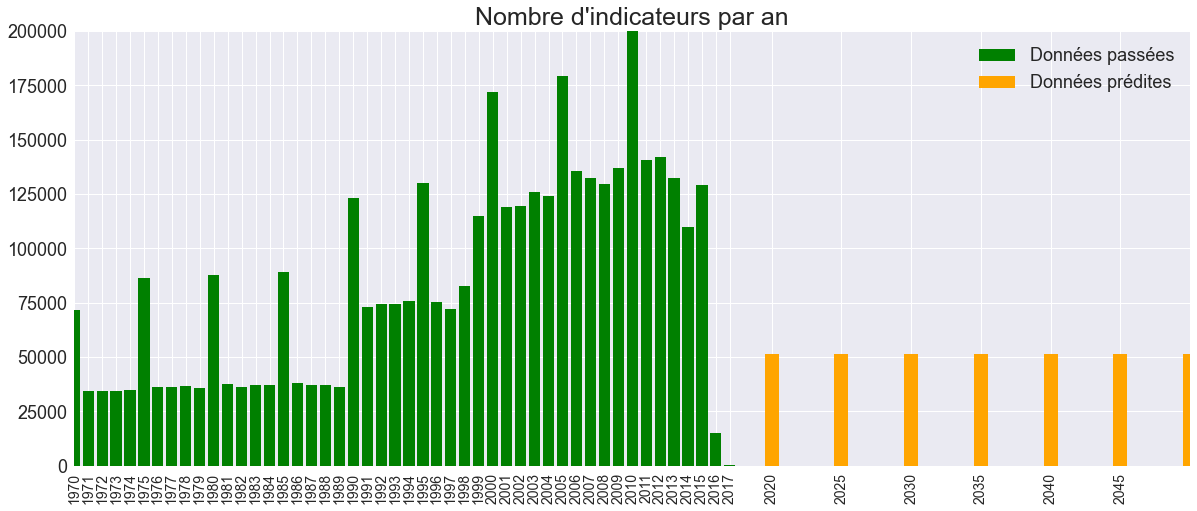

In [124]:
fig = plt.figure(figsize=(20,8))
plt.title("Nombre d'indicateurs par an", fontsize=25)
plt.axis([1970, 2050, 0, 200000])

plt.bar(years_past, counts_past, color='g', label='Données passées')
plt.bar(years_future, counts_future, color='orange', width=1, label='Données prédites')
plt.xticks(years[years < 2050], rotation=90, fontsize=14)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

Pas de données sures après 2017. Les predicitions ont commencées en 2020. On voit que beaucoup d'indicateurs ne sont rensignés que tous les 5 ans, tout comme les prédictions

### Afin de faire une première sélection des pays. Nous allons regarder certains critères :
#### L'acces à internet
#### La population du pays
#### Le taux d'alpabetisation

In [125]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name_x', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Topic', 'Long definition', 'Source', 'Special Notes',
       'Region', 'Income Group', 'Latest population census'],
      dtype='object')

In [126]:
data = data.rename(columns={'Indicator Name_x': 'Indicator_name'})

In [127]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator_name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Topic', 'Long definition', 'Source', 'Special Notes',
       'Region', 'Income Group', 'Latest population census'],
      dtype='object')

In [128]:
indicateurs_internet = []
indicateurs = data['Long definition'].unique()
for indicateur in indicateurs:
    mots = indicateur.split(' ')
    if 'internet' in [mot.lower() for mot in mots]:
        indicateurs_internet.append(indicateur)
len(indicateurs_internet)

1

Un seul indicateur contient le mot internet. Recupérons le code et le nom de cet indicateur

In [129]:
data_internet = data[data['Long definition'] == indicateurs_internet[0]]
code_indic_internet = data_internet['Indicator Code'].unique()[0]
nom_indic_internet = data_internet['Indicator_name'].unique()[0]
definition_indic_internet = data_internet['Long definition'].unique()[0]

In [130]:
code_indic_internet

'IT.NET.USER.P2'

In [131]:
nom_indic_internet

'Internet users (per 100 people)'

In [132]:
definition_indic_internet

'Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.'

#### Nous allons selectionner les pays dans lesquels plus de 75% de la population utilise internet selon le dernier relevé de cet indicateurs.

Regardons quand on été faits les derniers relevés

In [133]:
len(data_internet['Country Name'].unique())

241

In [134]:
len(data_internet['Country Code'].unique())

241

In [135]:
data_internet_2020 = data_internet[['Country Name', '2020']]

In [136]:
data_internet_2020.isnull().sum()

Country Name      0
2020            241
dtype: int64

Aucune infos pour 2020. Nous avions vu plus haut que 2020 est une année "prédictive".

In [137]:
data_internet_2017 = data_internet[['Country Name', '2017']]

In [138]:
data_internet_2017.isnull().sum()

Country Name      0
2017            241
dtype: int64

Pareil pour 2017

In [139]:
data_internet_2016 = data_internet[['Country Name', '2016']]

In [140]:
data_internet_2016.isnull().sum()

Country Name     0
2016            18
dtype: int64

Basons nous sur les données de 2016

Filtrons les pays dont le taux d'internet user est de moins de 75%

In [141]:
pays_internet_suffisant = data_internet_2016[data_internet_2016['2016'] >= 75]['Country Name']
len(pays_internet_suffisant)

59

Quid des pays sans relevés? Regardons s'ils ont des relevés antérieurs

In [142]:
pays_sans_releves_2016 = data_internet_2016[data_internet_2016['2016'].isnull()]['Country Name']

In [143]:
pays_sans_releves_2016

1343                     Arab World
23015                European Union
69971                  OECD members
102479               American Samoa
228899              Channel Islands
268631                      Curacao
423947                  Isle of Man
456455    Korea, Dem. People’s Rep.
463679                       Kosovo
582875                        Nauru
593711                New Caledonia
611771     Northern Mariana Islands
626219                        Palau
676787                   San Marino
705683    Sint Maarten (Dutch part)
727355                  South Sudan
745415     St. Martin (French part)
810431     Turks and Caicos Islands
Name: Country Name, dtype: object

J'identifie ici la necessité d'avoir une fonction qui retrouve l'année du dernier relevé pour un indicateur et un pays donné. cela me servira pour analyser d'autres indicateurs

In [144]:
years = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020']

def get_last_statement(indicateur, country):
    """Cette fonction prends un indicateur (code) et un pays et retourne l'année du dernier relevé
    """
    data_focus = data[(data['Indicator Code'] == indicateur) & (data['Country Name'] == country)]
    data_focus_bool = data_focus.isnull()
    #print(country, indicateur, data_focus.shape)
    last_statement = None
    for year in years:
        if not data_focus_bool[year].iloc[0]:
            #print(year, data_focus[year].iloc[0])
            last_statement = year
    return last_statement

In [145]:
get_last_statement(code_indic_internet, "Arab World")

'2013'

In [146]:
get_last_statement(code_indic_internet, "European Union")

'2013'

In [147]:
type(pays_internet_suffisant)

pandas.core.series.Series

In [148]:
country_ok = []
country_ko = []
for country in pays_sans_releves_2016:
    last_statement = get_last_statement(code_indic_internet, country)
    if last_statement == None:
        country_ko.append(country)
    else:
        last_value = data[(data['Indicator Code'] == code_indic_internet) & (data['Country Name'] == country)][last_statement].iloc[0]
        print(country, last_value, last_statement)
        if last_value >= 65: # Plus grande tolérance due à une plus grande ancienneté
            country_ok.append(country)
        else:
            country_ko.append(country)
print(country_ok)
print(country_ko)
country_ok = pd.Series(country_ok)
pays_internet_suffisant = pays_internet_suffisant.append(country_ok)

Arab World 36.8686015566291 2013
European Union 75.4976231672564 2013
OECD members 75.3900096548774 2013
American Samoa 0.0 1990
Korea, Dem. People’s Rep. 0.0 2012
New Caledonia 74.00175279 2015
Northern Mariana Islands 0.0 1990
Palau 26.97033263 2004
San Marino 49.6 2011
Turks and Caicos Islands 0.0 1990
['European Union', 'OECD members', 'New Caledonia']
['Arab World', 'American Samoa', 'Channel Islands', 'Curacao', 'Isle of Man', 'Korea, Dem. People’s Rep.', 'Kosovo', 'Nauru', 'Northern Mariana Islands', 'Palau', 'San Marino', 'Sint Maarten (Dutch part)', 'South Sudan', 'St. Martin (French part)', 'Turks and Caicos Islands']


In [149]:
len(pays_internet_suffisant)

62

In [150]:
pays_selection = pays_internet_suffisant.copy()

### Regardons maintenant la population de chacun de ces pays. En effet, si le pays est très peu peuplé il n'est pas necessaire de s'y implanter car cela demande un investissement important de s'y implanter (demarches légales, traduction eventuelles etc...)

Après une recherche sur le site de la banque mondiale, je veux utiliser l'indicateut qui s'appelle : 'Population, total'

In [151]:
code_indic_pop = 'SP.POP.TOTL'
data_pop = data[data['Indicator Code'] == code_indic_pop]

In [152]:
data_pop.head(2)

,Country Name,Country Code,Indicator_name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2090,2095,2100,Topic,Long definition,Source,Special Notes,Region,Income Group,Latest population census
2490,Arab World,ARB,"Population, total",SP.POP.TOTL,1.234009e+08,1.267261e+08,1.300956e+08,1.335924e+08,1.373274e+08,1.413761e+08,...,NaN,NaN,NaN,Health: Population: Structure,Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,Arab World aggregate. Arab World is composed o...,NaN,NaN,NaN
6102,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.288581e+09,1.322182e+09,1.354003e+09,1.384272e+09,1.414385e+09,1.441542e+09,...,NaN,NaN,NaN,Health: Population: Structure,Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,East Asia and Pacific regional aggregate (incl...,NaN,NaN,NaN


Arbitrairement, je vais eliminer les pays se situant en dessous du 25eme centile en terme de population.

In [153]:
help(get_last_statement)

Help on function get_last_statement in module __main__:

get_last_statement(indicateur, country)
    Cette fonction prends un indicateur (code) et un pays et retourne l'année du dernier relevé



In [154]:
last_pop_values = []
last_pop_years = []
for country in data_pop["Country Name"].unique():
    last_pop_year = get_last_statement(code_indic_pop, country)
    if last_pop_year == None:
        last_pop_years.append(np.nan)
        last_pop_values.append(np.nan)
    else:
        last_pop_years.append(last_pop_year)
        last_pop_value = data[(data['Indicator Code'] == code_indic_pop) & (data['Country Name'] == country)][last_pop_year].iloc[0]
        last_pop_values.append(last_pop_value)

Text(0, 0.5, 'Nombre de pays')

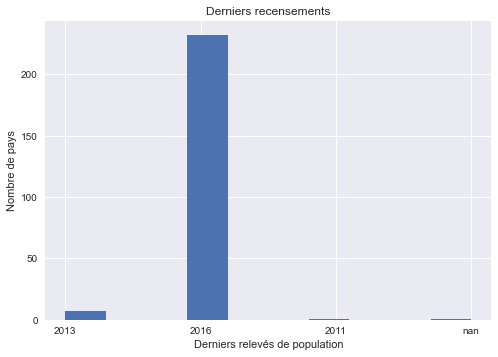

In [155]:
fig = plt.figure()
plt.title("Derniers recensements")
plt.hist(last_pop_years)
plt.xlabel('Derniers relevés de population')
plt.ylabel('Nombre de pays')

L'indicateur sur la population nationale de chaque pays est 'à jour' au regard du dataset

In [156]:
pop_df = pd.DataFrame([data['Country Name'].unique(), last_pop_years, last_pop_values])

In [157]:
pop_df = pop_df.T

In [158]:
pop_df = pop_df.rename(columns={0: 'Country', 1: "Last statement", 2: "Population"})

In [159]:
pop_df = pop_df.set_index('Country')

In [160]:
pop_df

,Last statement,Population
Country,,
Arab World,2013,3.69762e+08
East Asia & Pacific,2016,2.29679e+09
East Asia & Pacific (excluding high income),2016,2.05143e+09
Euro area,2016,3.40895e+08
Europe & Central Asia,2016,9.11995e+08
...,...,...
Virgin Islands (U.S.),2016,102951
West Bank and Gaza,2016,4.55157e+06
"Yemen, Rep.",2016,2.75842e+07


In [161]:
percentile_25 = pop_df['Population'].quantile(0.25)
percentile_25

1304528.5

In [162]:
pop_suffisantes_df = pop_df[pop_df['Population'] > percentile_25]

In [163]:
pays_pop_suffisantes = pop_suffisantes_df.index.values

In [164]:
len(pays_pop_suffisantes)

180

Nous avons récupéré les pays dont la population est suffisante et ou l'accès à internet est suffisant

Pour mettre à jour notre selection on peut faire une intersection entre ces deux listes

In [165]:
pays_selection = pays_selection.values

In [166]:
pays_selection = [country for country in pays_pop_suffisantes if country in pays_selection]

In [167]:
len(pays_selection)

43

### Regardons maintenant l'alphabetisation

In [172]:
indicateurs_literacy = []
indicateurs = data['Indicator_name'].unique()
for indicateur in indicateurs:
    indicateur_clean = indicateur.replace(',', '')
    mots = indicateur_clean.split(' ')
    if 'literacy' in [mot.lower() for mot in mots]:
        indicateurs_literacy.append(indicateur)
len(indicateurs_literacy)

47

In [173]:
indicateurs_literacy

['Adult literacy rate, population 15+ years, both sexes (%)',
 'Adult literacy rate, population 15+ years, female (%)',
 'Adult literacy rate, population 15+ years, male (%)',
 'Elderly literacy rate, population 65+ years, both sexes (%)',
 'Elderly literacy rate, population 65+ years, gender parity index (GPI)',
 'Literacy rate, population 25-64 years, both sexes (%)',
 'Literacy rate, population 25-64 years, female (%)',
 'Literacy rate, population 25-64 years, gender parity index (GPI)',
 'Literacy rate, population 25-64 years, male (%)',
 'PIAAC: Adults by literacy proficiency level (%). Below Level 1',
 'PIAAC: Adults by literacy proficiency level (%). Level 1',
 'PIAAC: Adults by literacy proficiency level (%). Level 2',
 'PIAAC: Adults by literacy proficiency level (%). Level 3',
 'PIAAC: Adults by literacy proficiency level (%). Level 4',
 'PIAAC: Adults by literacy proficiency level (%). Level 5',
 'PIAAC: Distribution of Adult Literacy Scores: 10th Percentile Score',
 'PIAAC:

#### Deux indicateurs correspondent au besoin:
##### - Adult literacy rate, population 15+ years, both sexes (%) 
Cet indicateur permet d'evaluer largement l'alphabetisation.
##### - Youth literacy rate, population 15-24 years, both sexes (%)
Celui-ci est plus orienté vers les très jeunes.

### Etant donné que l'on s'oriente vers un marché universitaire et que dans de nombreux pays on va a l'université jusqu'à plus tard qu'en France. Je décide de prendre le premier

In [216]:
indic_literacy = 'Adult literacy rate, population 15+ years, both sexes (%)'

In [217]:
data_literacy = data[data['Indicator_name'] == indic_literacy]
code_indic_literacy = data_literacy['Indicator Code'].iloc[0]
code_indic_literacy

'SE.ADT.LITR.ZS'

In [218]:
last_lit_values = []
last_lit_years = []
for country in data_literacy["Country Name"].unique():
    last_lit_year = get_last_statement(code_indic_literacy, country)
    if last_lit_year == None:
        last_lit_years.append(np.nan)
        last_lit_values.append(np.nan)
    else:
        last_lit_years.append(last_lit_year)
        last_lit_value = data[(data['Indicator Code'] == code_indic_literacy) & (data['Country Name'] == country)][last_lit_year].iloc[0]
        last_lit_values.append(last_lit_value)

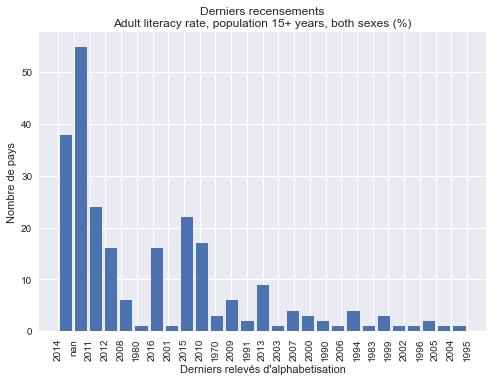

In [219]:
fig = plt.figure()
plt.title("Derniers recensements\nAdult literacy rate, population 15+ years, both sexes (%)")
plt.hist(last_lit_years, bins=len(set(last_lit_years)), rwidth=0.8, align='mid')
plt.xlabel("Derniers relevés d'alphabetisation")
plt.ylabel('Nombre de pays')
plt.xticks(rotation=90)
plt.show()

Cet indicateur n'est pas très satisfaisant. Regardons si l'autre est mieux

In [220]:
indic_literacy = 'Youth literacy rate, population 15-24 years, both sexes (%)'

In [221]:
data_literacy = data[data['Indicator_name'] == indic_literacy]
code_indic_literacy = data_literacy['Indicator Code'].iloc[0]
code_indic_literacy

'SE.ADT.1524.LT.ZS'

In [222]:
last_lit_values = []
last_lit_years = []
for country in data_literacy["Country Name"].unique():
    last_lit_year = get_last_statement(code_indic_literacy, country)
    if last_lit_year == None:
        last_lit_years.append(np.nan)
        last_lit_values.append(np.nan)
    else:
        last_lit_years.append(last_lit_year)
        last_lit_value = data[(data['Indicator Code'] == code_indic_literacy) & (data['Country Name'] == country)][last_lit_year].iloc[0]
        last_lit_values.append(last_lit_value)

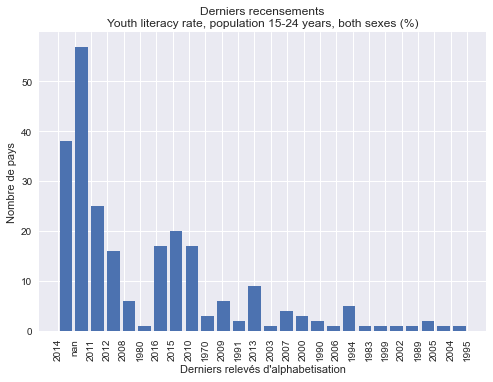

In [223]:
fig = plt.figure()
plt.title("Derniers recensements\nYouth literacy rate, population 15-24 years, both sexes (%)")
plt.hist(last_lit_years, bins=len(set(last_lit_years)), rwidth=0.8, align='mid')
plt.xlabel("Derniers relevés d'alphabetisation")
plt.ylabel('Nombre de pays')
plt.xticks(rotation=90)
plt.show()

On obtient des resultats similaires. On va donc garder le premier indicateur: Adult literacy rate, population 15+ years, both sexes (%)
## A VALIDER. TRACER LES DEUX ENSEMBLE

Que faire des pays non renseignés? +50 pays sans relevés

In [231]:
lit_df = pd.DataFrame([data['Country Name'].unique(), last_lit_years, last_lit_values])

In [232]:
lit_df = lit_df.T

In [233]:
lit_df = lit_df.rename(columns={0: 'Country', 1: "Last statement", 2: "Literacy rate"})

In [234]:
lit_df = lit_df.set_index('Country')

In [235]:
lit_df

,Last statement,Literacy rate
Country,,
Arab World,2014,88.9647
East Asia & Pacific,2014,99.0044
East Asia & Pacific (excluding high income),2014,98.9691
Euro area,NaN,NaN
Europe & Central Asia,2014,99.7114
...,...,...
Virgin Islands (U.S.),NaN,NaN
West Bank and Gaza,2016,99.3837
"Yemen, Rep.",1994,60.2221


In [244]:
percentile_25 = lit_df['Literacy rate'].quantile(0.1)
percentile_25

62.28613500000001

In [245]:
lit_suffisantes_df = lit_df[lit_df['Literacy rate'] > percentile_25]

In [246]:
pays_lit_suffisantes = lit_suffisantes_df.index.values

In [247]:
len(pays_lit_suffisantes)

165

Nous avons récupéré les pays dont la population est suffisament lettrée

Pour mettre à jour notre selection on peut faire une nouvelle intersection

In [248]:
pays_lit_suffisantes

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'South Asia', 'Sub-Saharan Africa',
       'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Aruba', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', '

In [249]:
list(set(pays_selection).intersection(set(pays_lit_suffisantes)))

['Malaysia',
 'Estonia',
 'Spain',
 'Puerto Rico',
 'Slovenia',
 'Hungary',
 'Russian Federation',
 'Lebanon',
 'Latvia',
 'Israel',
 'Singapore',
 'United Arab Emirates',
 'Azerbaijan',
 'Qatar',
 'Kuwait',
 'Bahrain',
 'Kazakhstan']

Liste trop réduite. Problème venant du manque de data. A revoir

In [167]:
len(pays_selection)

43